## Invididual Project Applied Data Science For Business
Nama : Jonathan Christopher

NIM : 23101910043

### Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xicor.xicor import Xi
from xicorrelation import xicorr
import random
import geopy.distance
import re
import warnings
import datetime
from pandas_profiling import ProfileReport
import pygeohash as pgh
import math

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(style='darkgrid')
params = {'font.family': 'Times New Roman', 'axes.labelsize': 14, 'xtick.labelsize': 14, 
          'ytick.labelsize': 14, 'axes.labelweight': 'bold'}
plt.rcParams.update(params)


### Importing Data

In [2]:
filepath1 = 'Y:/Chrome/Individual Project Files/'
filename1 = 'Customer Data.xlsx'

In [3]:
filepath2 = 'Y:/Chrome/Individual Project Files/'
filename2 = 'Customer_Data.csv'

In [4]:
def import_excel_data(filepath1, filename1, sheet_name, col_names=None, nrows=None):
    return pd.read_excel(filepath1 + filename1, sheet_name=sheet_name, usecols=col_names, nrows=nrows)

In [5]:
def import_csv_data(filepath2, filename2, col_names=None, nrows=None):
    return pd.read_csv(filepath2 + filename2, usecols=col_names, nrows=nrows)

In [6]:
df1=import_excel_data(filepath1,filename1,sheet_name='Sample')

In [7]:
df2=import_csv_data(filepath2,filename2)

In [8]:
df2['maid_md5'].isin(df1['mdm_id']).value_counts() #Kolom maid_md5 di df2sama dengan mdm_id

True    88
Name: maid_md5, dtype: int64

In [9]:
df1['mdm_id'].unique

<bound method Series.unique of 0     77fa83ed01e72b523d6756e21b******
1     eb11655ad25c779e714380eadf******
2     9bbba1a492ebdab5c9f72c3551******
3     8172c382bf0233a182e7626ff6******
4     9d17c8d650f11c2d6fc1d64d18******
                    ...               
95    982af16c81f112cc69f6bdaaa2******
96    0d1172df74b8e8a1dd8045d38c******
97    63930bfccec185ccbdc98601b0******
98    f052f02040d6620dd0eb98a423******
99    86b710399506d95a2ee6651c1e******
Name: mdm_id, Length: 100, dtype: object>

All values of maid_md5 column of df2 has the exact same values as in mdm_id of df1, except mdm_id has more values. So we can do left join so that the remaining values that df1 have will not be dropped. We will rename maid_md5 and drop maid column because maid column is also unique identifier like maid_md5, but in different formats.

In [10]:
df2.rename(columns = {'maid_md5':'mdm_id'}, inplace = True)
df2=df2.drop(['maid'],axis=1)

#### Filling brands_visited, place_categories, geo_behaviour, interests, travelled countries of df1 with df2

Here, I make a code to fill brands_visited, place_categories, geo_behaviour, interests, travelled countries, and app_usage of df1 with df2. If df1 and df2 is different, the code will add all the values of the cell in the df2 into df1.

Match the index of df2 with df1 first 

In [11]:
df2 = df2.set_index('mdm_id') 
df2 = df2.reindex(index=df1['mdm_id'])
df2 = df2.reset_index()

In [12]:
def fixer(df1,df2,namakol):
    listambah=[]
    lol=1
    for i in df1.index:
        if pd.isna(df2[namakol][i]):
            lol=1
        elif pd.isna(df1[namakol][i]) and pd.isna(df2[namakol][i])==False:
            listambah.extend(df2[namakol][i].split(','))
            df1[namakol][i]=','.join(list(set(listambah)))
        elif pd.isna(df1[namakol][i])==False and pd.isna(df2[namakol][i])==False:
            if df1[namakol][i]!=df2[namakol][i]:
                listambah.extend(df1[namakol][i].split(','))
                listambah.extend(df2[namakol][i].split(','))
                df1[namakol][i]=','.join(list(set(listambah)))
        elif pd.isna(df1[namakol][i]) and pd.isna(df1[namakol][i]):
            lol=1
        listambah=[]

In [13]:
fixer(df1,df2,'brands_visited')

In [14]:
fixer(df1,df2,'place_categories')

In [15]:
fixer(df1,df2,'geo_behaviour')

In [16]:
fixer(df1,df2,'interests')

In [17]:
fixer(df1,df2,'travelled_countries')

In [18]:
df1['device_price'].fillna(df2['device_price'], inplace=True)
df1['carrier'].fillna(df2['carrier'], inplace=True)

### Merging df1 with df2

In [19]:
df3=pd.merge(df1,df2,on=['mdm_id','id_type','gender','age','carrier','make','model', 'os',
       'os_version', 'home_country', 'home_geohash','device_price', 'affluence',
       'brands_visited', 'place_categories', 'geo_behaviour', 'interests',
       'travelled_countries','work_geohash'],how='left')

### Profiling

In [20]:
#ProfileReport(df3,title='Data Training Profiling Report',explorative=True,minimal=False)

### Data Cleaning

In [21]:
df3

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
0,77fa83ed01e72b523d6756e21b******,GAID,male,23,pt. wireless indonesia,9,redmi note 8,android,9,IDN,qqtukfjg,-7.678843,109.552746,qqtumhd,-7.665024,109.559097,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,NaN,Jawa Tengah,Kebumen,Adimulyo,Kemujan,Jawa Tengah,Kebumen,Adimulyo,Mangunharjo,NaN
1,eb11655ad25c779e714380eadf******,GAID,male,35,indosat internet network provider,xiaomi,redmi 5,android,7.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,indosat internet network provider,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN
2,9bbba1a492ebdab5c9f72c3551******,GAID,male,45,telkomsel,oppo,cph1989,android,10,IDN,NaN,NaN,NaN,qqgmtxe1,-6.022997,106.066303,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,telkomsel,NaN,NaN,NaN,NaN,Banten,Kota Cilegon,Jombang,Sukmajaya,2002_january
3,8172c382bf0233a182e7626ff6******,GAID,NaN,51,pt. wireless indonesia,oppo,cph1909,android,8.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,NaN,NaN,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN
4,9d17c8d650f11c2d6fc1d64d18******,GAID,male,28,xl axiata,oppo,a1601,android,5.1,IDN,qqycr0p,-6.810837,111.060104,qqycr05h,-6.810751,111.054096,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,xl axiata,Jawa Tengah,Pati,Gabus,Sunggingwarno,Jawa Tengah,Pati,Gabus,Penanggungan,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,982af16c81f112cc69f6bdaaa2******,GAID,male,23,NaN,oppo,cph1911,android,11,IDN,w21vgpjk,1.049967,103.850155,w21vvts,1.041641,103.958817,285.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,PRODUCTIVITY,COMMUNICATION",18-24,PT Telkom Indonesia,NaN,Kepulauan Riau,Kota Batam,Belakang Padang,Kasu,Kepulauan Riau,Kota Batam,Sagulung,Sungai Langkai,2019_may
96,0d1172df74b8e8a1dd8045d38c******,GAID,male,32,xl axiata,oppo,cph1823,android,10,IDN,qw3ytw2,-8.666153,115.203323,qw3ytw2,-8.666153,115.203323,339.0,Medium-Affluent,"Mercure Visitors,Apotek Visitors,Bakery Visito...","Hotels Visitors,Supermarket Visitors,Primary A...","Parents,Affluent Consumers,Working Parents,Tou...",NaN,NaN,NaN,25-34,PT Linknet,xl axiata,Bali,Kota Denpasar,Denpasar Barat,Pemecutan Klod,Bali,Kota Denpasar,Denpasar Barat,Pemecutan Klod,NaN
97,63930bfccec185ccbdc98601b0******,GAID,male,24,telkomsel,oppo,cph1803,android,8.1,IDN,qw8nv82p,-7.248316,112.741871,qwbb2bj,-6.986618,113.595200,160.0,Low-Affluent,NaN,NaN,NaN,NaN,MYS,NaN,18-24,NaN,telkomsel,Jawa Timur,Kota Surabaya,Bubutan,Alon-Alon Contong,Jawa Timur,Pamekasan,Waru,Ragang,2018_july
98,f052f02040d6620dd0eb98a423******,GAID,male,21,telkomsel,9,cph2015,android,9,IDN,qqu53fh,-6.448288,106.958084,qqu53fh,-6.448288,106.958084,176.0,Low-Affluent,"Gokana Visitors,Erafone Visitors,Indomaret Vis...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Budget Travellers,Automobi...","Dating,Technology & Computing,Web Conferencing...",NaN,NaN,18-24,NaN,telkomsel,Jawa Barat,Bogor,Kelapa Nunggal,Kelapa Nunggal,Jawa Barat,Bogor,Kelapa Nunggal,Kelapa Nunggal,NaN

#### Value Imputation of Gender Column

In [22]:
df3['gender'] = df3['gender'].fillna(df3['gender'].mode()[0])

#### Deleting Rows in which the device_price is null or zero

In [23]:
#df3['device_price']=df3['device_price'].replace(0, np.nan) #replacing zeroes with null values in device prices
#df3 = df3[df3['device_price'].notnull()] #choosing only rows when device price is not null (not zero too, since zero has been changed with null)

#### Replacing the wrong makes

In [24]:
df3['make'].unique()

array([9, 'xiaomi', 'oppo', 'samsung', 11, 'vivo', nan, 'realme',
       'huawei', 'apple', 'generic', 'asus', 10, 'infinix', 'sony'],
      dtype=object)

In [25]:
df2[(df2['make'] == '9')].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,work_geohash,device_price,device_age,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries
20,0df266e8010b16a2c85550ba1f******,GAID,male,25.0,telkomsel,9,vivo 1904,android,9.0,IDN,wb2b2sw,wb2b2sw,182.0,2019_june,Low-Affluent,"Pertamina Visitors,Maxx Coffee Visitors,Hyperm...","Hospitals, Clinics And Medical Centers Visitor...","Job Seekers,In-Market Insurance Buyers,DIY Ent...","Arts and Crafts,Photography,Hobbies & Interest...",NaN
35,56339eee995113930731fa23ff******,GAID,male,21.0,telkomsel,9,mi a1,android,9.0,IDN,qw8ntwq5,qqxet7vf,234.0,2017_september,Medium-Affluent,NaN,NaN,NaN,NaN,NaN
56,de0b6faf48e85fbd84b39fbed6******,GAID,male,25.0,xl axiata,9,rmx1805,android,9.0,IDN,qw8nv82,qw8nv82p,166.0,2018_august,Low-Affluent,NaN,"Car Service Center Visitors,Government Office ...","Parents of School Children,Family Leisure Enth...","Business,Technology & Computing,Hobbies & Inte...",SGP
58,4ab79763843cc4d30076c9f4c8******,GAID,male,28.0,xl axiata,9,rmx1941,android,9.0,IDN,qxhfq4x,qxhfmcv,116.0,2019_may,Low-Affluent,"Pertamina Visitors,Mazda Visitors,KFC Visitors","Clothing And Accessories Visitors,Burger Resta...","Job Seekers,3 Star Hotel Travellers,DIY Enthus...","Video Gaming,Video & Computer Games",NaN
98,f052f02040d6620dd0eb98a423******,GAID,male,21.0,telkomsel,9,cph2015,android,9.0,IDN,qqu53fh,qqu53fh,176.0,2020_february,Low-Affluent,"Pertamina Visitors,Indomaret Visitors,Bank Man...","Hospitals, Clinics And Medical Centers Visitor...","Budget Travellers,Job Seekers,In-Market Insura...","Arts and Crafts,Photography,Hobbies & Interest...",NaN


In [26]:
df3[(df3['make'] == 9)].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
0,77fa83ed01e72b523d6756e21b******,GAID,male,23,pt. wireless indonesia,9,redmi note 8,android,9,IDN,qqtukfjg,-7.678843,109.552746,qqtumhd,-7.665024,109.559097,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,NaN,Jawa Tengah,Kebumen,Adimulyo,Kemujan,Jawa Tengah,Kebumen,Adimulyo,Mangunharjo,NaN
9,8ea694ff298420831197628678******,GAID,male,22,indosat internet network provider,9,mi a1,android,9,IDN,qqu2pju,-6.998978,107.540359,qqu88v3,-6.913834,107.613144,234.0,Medium-Affluent,NaN,"Supermarket Visitors,Restaurant Visitors,Place...","In-Market Wedding Planning,Parents of School C...",Health & Fitness,NaN,NaN,18-24,PT Telkom Indonesia,indosat internet network provider,Jawa Barat,Bandung,Kutawaringin,Kopo,Jawa Barat,Kota Bandung,Sumur Bandung,Babakan Ciamis,NaN
20,0df266e8010b16a2c85550ba1f******,GAID,male,25,telkomsel,9,vivo 1904,android,9,IDN,wb2b2sw,1.475601,124.835587,wb2b2sw,1.475601,124.835587,182.0,Low-Affluent,"Hypermart Visitors,Bank Mandiri Visitors,Alfam...","Electrical And Electronics Shoppers,Cinemas Vi...","Home Movers,Parents,Beer Enthusiasts,Automobil...","Dating,Web Conferencing,Society,Arts and Craft...",NaN,NaN,25-34,NaN,telkomsel,Sulawesi Utara,Kota Manado,Sario,Titiwungen Selatan,Sulawesi Utara,Kota Manado,Sario,Titiwungen Selatan,NaN
35,56339eee995113930731fa23ff******,GAID,male,21,telkomsel,9,mi a1,android,9,IDN,qw8ntwq5,-7.259989,112.750111,qqxeq1bh,-7.855825,112.060719,234.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,NaN,18-24,NaN,telkomsel,Jawa Timur,Kota Surabaya,Genteng,Ketabang,Jawa Timur,Kota Kediri,Pesantren,Bawang,NaN
58,4ab79763843cc4d30076c9f4c8******,GAID,male,28,xl axiata,9,rmx1941,android,9,IDN,qxhfq4x,-5.215073,119.453659,qxhfmcv,-5.219193,119.439926,116.0,Low-Affluent,"Bank Negara Visitors,Bank Mandiri Visitors,Alf...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,In-Market Appliance Shoppe...","Video & Computer Games,Video Gaming",NaN,NaN,25-34,PT Telkom Indonesia,xl axiata,Sulawesi Selatan,Gowa,Pallangga,Pangkabinanga,Sulawesi Selatan,Gowa,Pallangga,Jenetallasa,NaN


In [27]:
df2[(df2['make'] == '10')].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,work_geohash,device_price,device_age,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries
51,4aa5743e37e0d17b072f8b483a******,GAID,male,30.0,telkomsel,10,cph2185,android,10.0,IDN,qqszcm6,qqu35ks,160.0,2020_october,Low-Affluent,"Pertamina Visitors,Indomaret Visitors,Sampoern...","Theme Parks Visitors,Hospitals, Clinics And Me...","In-Market Insurance Buyers,DIY Enthusiasts,Fre...","Arts and Crafts,Photography,Hobbies & Interest...",NaN
84,74eb1eb43edbf727ef73874545******,GAID,male,22.0,indosat internet network provider,10,redmi note 9 pro,android,10.0,IDN,qqu5bpb,qqu5bpb,215.0,2020_march,Medium-Affluent,"Bank Mandiri Visitors,Indomaret Visitors,Sampo...","Theme Parks Visitors,Hospitals, Clinics And Me...","Budget Travellers,Job Seekers,In-Market Insura...","Arts and Crafts,Photography,Hobbies & Interest...",NaN


In [28]:
df3[(df3['make'] == 10)].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
51,4aa5743e37e0d17b072f8b483a******,GAID,male,30,telkomsel,10,cph2185,android,10,IDN,qqtk0rs,-7.692490,108.649979,qqu35ks,-6.830063,107.375565,160.0,Low-Affluent,"Sampoerna Visitors,Indomaret Visitors,Pertamin...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Beer Enthusiasts,Automobil...","Dating,Web Conferencing,Society,Arts and Craft...",NaN,SOCIAL,25-34,PT Transtech Communication Media,telkomsel,Jawa Barat,Pangandaran,Pangandaran,Pananjung,Jawa Barat,Bandung Barat,Cipatat,Ciptaharja,NaN
84,74eb1eb43edbf727ef73874545******,GAID,male,22,indosat internet network provider,10,redmi note 9 pro,android,10,IDN,qqu5bpb,-6.328812,106.875687,qqu5bpb,-6.328812,106.875687,215.0,Medium-Affluent,"Bank Tabungan Negara Visitors,J.Co Visitors,In...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Beer Enthusiasts,Budget Tr...","Arts and Crafts,Photography,Hobbies & Interest...",NaN,"SOCIAL,PHOTOGRAPHY",18-24,NaN,indosat internet network provider,Dki Jakarta,Kota Jakarta Timur,Ciracas,Ciracas,Dki Jakarta,Kota Jakarta Timur,Ciracas,Ciracas,NaN


In [29]:
df2[(df2['make'] == '11')].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,work_geohash,device_price,device_age,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries
40,96e129742e4a80decbaff0c3c9******,GAID,male,21.0,telkomsel,11,sm-a507fn,android,11.0,IDN,w0whmf6,w0whsb1,0.0,2011_october,NaN,Indomaret Visitors,"Hospitals, Clinics And Medical Centers Visitor...","In-Market Wedding Planning,DIY Enthusiasts,In-...","Fine Art,Business,Entertainment,Technology & C...",NaN
59,95dffa2a0a8481852cd4516089******,GAID,male,32.0,indosat internet network provider,11,vivo 2007,android,11.0,IDN,qquj00w,qquj0ks,0.0,2011_october,NaN,"HokBen Visitors,CFC Visitors,Eiger Visitors,Ba...","Hospitals, Clinics And Medical Centers Visitor...","Frequent Train Travelers,In-Market Insurance B...","Technology & Computing,Health & Fitness,Arts a...",NaN
78,1a284ca6cddf1a7376c7c35bc4******,GAID,male,27.0,telkomsel,11,vivo 1901,android,11.0,IDN,qqgu3w1,qqgu3v6,232.0,2019_may,Medium-Affluent,Mercure Hotel Visitors,"Hospitals, Clinics And Medical Centers Visitor...","In-Market Insurance Buyers,DIY Enthusiasts,Aut...","Technology & Computing,Arts & Entertainment,Vi...",NaN


In [30]:
df3[(df3['make'] == 11)].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
10,1e3507e79cb6e2dfa333103032******,GAID,male,20,telkomsel,11,sm-a515f,android,11,IDN,w204ven0,0.499964,101.500111,w204v5j,0.500565,101.477280,345.0,Medium-Affluent,"Indomaret Visitors,J.Co Visitors,Apotek Visito...","Electrical And Electronics Shoppers,Cinemas Vi...","Home Movers,Parents,Beer Enthusiasts,Budget Tr...","Personal Finance,Email,Dating,Computer Periphe...",NaN,NaN,18-24,PT Telkom Indonesia,telkomsel,Riau,Kota Pekanbaru,Tenayan Raya,Sail,Riau,Kota Pekanbaru,Bukit Raya,Tengkerang Utara,NaN
59,95dffa2a0a8481852cd4516089******,GAID,male,32,indosat internet network provider,11,vivo 2007,android,11,IDN,qquj0ks,-6.126938,106.892166,qquj0ks,-6.126938,106.892166,0.0,NaN,"ibis Hotel Visitors,Bengawan Solo Coffee Visit...","Electrical And Electronics Shoppers,Public Tra...","Home Movers,Frequent Train Travelers,Parents,B...","Computer Peripherals,Dating,Technology & Compu...",NaN,SOCIAL,25-34,PT Telkom Indonesia,indosat internet network provider,Dki Jakarta,Kota Jakarta Utara,Tanjung Priok,Kebon Bawang,Dki Jakarta,Kota Jakarta Utara,Tanjung Priok,Kebon Bawang,NaN


In [31]:
df2[(df2['make'] == 'generic')].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,work_geohash,device_price,device_age,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries
10,1e3507e79cb6e2dfa333103032******,GAID,male,20.0,telkomsel,generic,android 4.0,android,4.0,IDN,w204ven0,w204v5j,0.0,2011_october,NaN,"Pizza Hut Visitors,Toys City Visitors,Sports S...","Hospitals, Clinics And Medical Centers Visitor...","In-Market Insurance Buyers,3 Star Hotel Travel...","Arts and Crafts,Business,Photography,Email,Tec...",NaN
27,5f1f99f7906a9acbe308b1fcb9******,GAID,female,19.0,pt wireless indonesia win,generic,android 11.0,android,11.0,IDN,qw8nh6rn,qw8n5vwx,0.0,2020_september,NaN,NaN,"Supermarket Visitors,Grocery Store Visitors,Pr...","Parents of School Children,Family Leisure Enth...","Education,Arts & Entertainment,Comic Books,Boo...",NaN
28,6435a6259ff3c679a7c446979b******,GAID,male,23.0,telkomsel,generic,android 10.0,android,10.0,IDN,NaN,qqgudzk4,NaN,NaN,NaN,NaN,NaN,NaN,"Business,News and Politics,Technology & Comput...",NaN
46,87170b93d4fce8ac288ec9e185******,GAID,male,34.0,indosat internet network provider,generic,android 4.0,android,11.0,IDN,w8599jx8,w8599k3,0.0,2011_october,NaN,NaN,NaN,NaN,"Business,Technology & Computing,Personal Finan...",NaN
52,8eaa1b959f5b1ef0d9ccfe210c******,GAID,female,31.0,three indonesia,generic,android 10.0,android,11.0,IDN,qw89b183,qw87zbg,0.0,NaN,NaN,NaN,"Commercial Building Visitors,Primary And Secon...","Parents,In-Market Insurance Buyers,Tour Enthus...",NaN,NaN


In [32]:
df3[(df3['make'] == 'generic')].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
27,5f1f99f7906a9acbe308b1fcb9******,GAID,female,19,pt wireless indonesia win,generic,android 11.0,android,11,IDN,qw8nh6rn,-7.369337,112.696552,qw8n5vwx,-7.351313,112.673893,0.0,NaN,NaN,"Supermarket Visitors,Grocery Store Visitors,Pr...","Parents of School Children,Family Leisure Enth...","Dating,Technology & Computing,Collecting,Web C...",NaN,"SOCIAL,PRODUCTIVITY,PHOTOGRAPHY,COMICS",18-24,pt wireless indonesia win,NaN,Jawa Timur,Sidoarjo,Taman,Geluran,Jawa Timur,Kota Surabaya,Karang Pilang,Warugunung,NaN
28,6435a6259ff3c679a7c446979b******,GAID,male,23,telkomsel,generic,android 10.0,android,10,IDN,NaN,NaN,NaN,qqgudzk4,-6.199980,106.649952,NaN,NaN,NaN,NaN,NaN,"Fine Art,Computer Peripherals,Technology & Com...",NaN,PRODUCTIVITY,18-24,NaN,telkomsel,NaN,NaN,NaN,NaN,Banten,Kota Tangerang,Tangerang,Kelapa Indah,NaN
46,87170b93d4fce8ac288ec9e185******,GAID,male,34,indosat internet network provider,generic,android 11.0,android,11,IDN,w8599jx8,0.293970,117.476292,w8599k3,0.287704,117.478867,0.0,NaN,NaN,NaN,NaN,"Computer Peripherals,Dating,Technology & Compu...",NaN,"SOCIAL,TOOLS,WEATHER,PHOTOGRAPHY",25-34,NaN,indosat internet network provider,Kalimantan Timur,Kutai Timur,Teluk Pandan,Kandolo,Kalimantan Timur,Kutai Timur,Teluk Pandan,Kandolo,NaN
52,8eaa1b959f5b1ef0d9ccfe210c******,GAID,female,31,three indonesia,generic,android 10.0,android,10,IDN,qw89b183,-8.121386,113.203640,qw87zbg,-7.773514,113.196945,0.0,NaN,NaN,"Commercial Building Visitors,Primary And Secon...","Parents,In-Market Travel,In-Market Insurance B...",NaN,NaN,TOOLS,25-34,NaN,three indonesia,Jawa Timur,Lumajang,Sukodono,Klanting,Jawa Timur,Kota Probolinggo,Kanigaran,Curahgrinting,NaN
53,c2933bb919494faf49d7d75c88******,GAID,male,28,NaN,generic,android 11.0,android,11,IDN,qxgm4548,-0.510778,117.161808,qxg0gp8n,-1.232100,116.850758,0.0,NaN,NaN,"Gym And Fitness Centre Visitors,Sports Club Vi...",NaN,"Business,Technology & Computing,Web Conferenci...",NaN,"SOCIAL,PHOTOGRAPHY",25-34,NaN,NaN,Kalimantan Timur,Kota Samarinda,Samarinda Ilir,Selili,Kalimantan Timur,Kota Balikpapan,Balikpapan Utara,Gunung Samarinda,NaN


Some of the makes are either 9, 10, or 11, but the model from which they have the same make also turns out to have varying makes, such as xiaomi, oppo, etc. In three of the dataframe above, we see that each of the makes that says 9, 10, or 11 are actually the same as the os_version, indicating a mistake in data collection. This will be cleaned.

Based on the observation and previous knowledge, we know that the model that begins with 'rmx' is from Realme, 'sm' is from Samsung, 'cph' is from Oppo, 'redmi' and 'mi' is from Xiaomi, and "Vivo" is obviously from Vivo.

#### Create a program to replace the the numbers with corresponding makes.

In [33]:
for i in df3.index:
    if df3['make'][i] == 9 or df3['make'][i] == 10 or df3['make'][i] == 11:
        if 'mi' in df3['model'][i]:
            df3['make'][i] = 'xiaomi'
        elif 'sm' in df3['model'][i]:
            df3['make'][i] = 'samsung'
        elif 'rmx' in df3['model'][i]:
            df3['make'][i] = 'realme'
        elif 'cph' in df3['model'][i]:
            df3['make'][i] = 'oppo'
        elif 'vivo' in df3['model'][i]:
            df3['make'][i] = 'vivo'
        else:
            None

#### Check if the replacings are done.

In [34]:
#To check if the replacings are done.
for i in df3.index:
    if df3['make'][i] == 9 or df3['make'][i] == 10 or df3['make'][i] == 11:
        print("Still Incomplete")
    else:
        None

In [35]:
df3['make'].unique()

array(['xiaomi', 'oppo', 'samsung', 'vivo', nan, 'realme', 'huawei',
       'apple', 'generic', 'asus', 'infinix', 'sony'], dtype=object)

#### Fixing the wrong type in os_version column

In [36]:
df3['os_version'].unique()

array([9, 7.1, 10, 8.1, 5.1, 11, 8, 14.4, datetime.time(8, 1),
       datetime.time(7, 1, 2), 13.6, datetime.time(6, 0, 1), 6, 5, 4.4, 7],
      dtype=object)

#### Finding the wrong types

In [37]:
df3[(df3['os_version'] == datetime.time(8,1))].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
25,2a2054b5f8dbc4165c3776730b******,GAID,male,42,pt. wireless indonesia,oppo,cph1909,android,08:01:00,IDN,qxhfty57,-5.151987,119.437008,qxhfty57,-5.151987,119.437008,143.0,Low-Affluent,NaN,Primary And Secondary Schools Visitors,"Family Leisure Enthusiasts,Parents of School C...",NaN,NaN,NaN,35-44,NaN,NaN,Sulawesi Selatan,Kota Makassar,Panakkukang,Masale,Sulawesi Selatan,Kota Makassar,Panakkukang,Masale,NaN
81,86bca6201a52afcb126b48601a******,GAID,male,19,telkomsel,oppo,cph1803,android,08:01:00,IDN,qxmr0dg1,-2.972918,119.909077,qxmr0kq,-2.964249,119.902725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18-24,NaN,telkomsel,Sulawesi Selatan,Toraja Utara,Rantepao,Kelurahan Pasele,Sulawesi Selatan,Toraja Utara,Tallunglipu,Kelurahan Tagari Tallung Lipu,NaN


In [38]:
df3[(df3['os_version'] == datetime.time(6, 0, 1))].head()

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age
33,bf4be6853b9a04f4c655a57507******,GAID,male,33,xl axiata,xiaomi,redmi 3s,android,06:00:01,IDN,qqguxcx,-6.231308,106.874313,qqguxcx,-6.231308,106.874313,135.0,Low-Affluent,NaN,NaN,NaN,NaN,NaN,NaN,25-34,NaN,xl axiata,Dki Jakarta,Kota Jakarta Timur,Jatinegara,Cipinang Cempedak,Dki Jakarta,Kota Jakarta Timur,Jatinegara,Cipinang Cempedak,NaN


#### Making a program to fix the wrong values. 

It is much easier to fix the values with datetime.time type by using the attributes of datetime.time, which are hour, minute, and second. Each of the hour, minute, and second are changed into an integer, then combined into a float. Hour is left as is, minute is divided by 10, and second is divided by 100. Note that the values in datetime type is purely a mistake, not intended to be datetime, so it is converted intuitively. (08:01:00 is changed into 8.1, 06:00:01 is changed into 6.01).

In [39]:
for i in df3.index:
    if type(df3['os_version'][i])==datetime.time:
        df3['os_version'][i]=df3['os_version'][i].hour + df3['os_version'][i].minute/10 + df3['os_version'][i].second/100
    else:
        None

In [40]:
df3['os_version'].unique()

array([9, 7.1, 10, 8.1, 5.1, 11, 8, 14.4, 7.119999999999999, 13.6, 6.01,
       6, 5, 4.4, 7], dtype=object)

### Finding Distance (KM) Between Work and Home Using Geopy (Feature Engineering)

In [41]:
df3=df3.assign(distance='NAN') #Creating distance column with nan values first

In [42]:
df3.count()

mdm_id                 100
id_type                100
gender                 100
age                    100
carrier                 91
make                    95
model                   95
os                     100
os_version             100
home_country           100
home_geohash            89
home_lat                89
home_lon                89
work_geohash            96
work_lat                96
work_lon                96
device_price            83
affluence               63
brands_visited          29
place_categories        54
geo_behaviour           53
interests               52
travelled_countries     12
app_usage               49
age_group              100
broadband               30
cellular                82
home_prop               88
home_kab                88
home_kec                88
home_desakel            88
work_prop               96
work_kab                96
work_kec                96
work_desakel            96
device_age              11
distance               100
d

In [43]:
for i in df3.index: #Getting km distance from longitudes and latitudes.
    if np.isnan(df3['work_lat'][i])==True or np.isnan(df3['home_lon'][i])==True: #If a person's work latitude or longitude is nan, then the distance is also nan, since they have no job, cannot be calculated.
        df3['distance'][i]=np.nan
    else:
        df3['distance'][i]=geopy.distance.distance((df3['home_lat'][i],df3['home_lon'][i]),(df3['work_lat'][i],df3['work_lon'][i])).km

In [44]:
df3

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age,distance
0,77fa83ed01e72b523d6756e21b******,GAID,male,23,pt. wireless indonesia,xiaomi,redmi note 8,android,9,IDN,qqtukfjg,-7.678843,109.552746,qqtumhd,-7.665024,109.559097,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,NaN,Jawa Tengah,Kebumen,Adimulyo,Kemujan,Jawa Tengah,Kebumen,Adimulyo,Mangunharjo,NaN,1.68127
1,eb11655ad25c779e714380eadf******,GAID,male,35,indosat internet network provider,xiaomi,redmi 5,android,7.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,indosat internet network provider,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN,0
2,9bbba1a492ebdab5c9f72c3551******,GAID,male,45,telkomsel,oppo,cph1989,android,10,IDN,NaN,NaN,NaN,qqgmtxe1,-6.022997,106.066303,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,telkomsel,NaN,NaN,NaN,NaN,Banten,Kota Cilegon,Jombang,Sukmajaya,2002_january,NaN
3,8172c382bf0233a182e7626ff6******,GAID,male,51,pt. wireless indonesia,oppo,cph1909,android,8.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,NaN,NaN,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN,0
4,9d17c8d650f11c2d6fc1d64d18******,GAID,male,28,xl axiata,oppo,a1601,android,5.1,IDN,qqycr0p,-6.810837,111.060104,qqycr05h,-6.810751,111.054096,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,xl axiata,Jawa Tengah,Pati,Gabus,Sunggingwarno,Jawa Tengah,Pati,Gabus,Penanggungan,NaN,0.664203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,982af16c81f112cc69f6bdaaa2******,GAID,male,23,NaN,oppo,cph1911,android,11,IDN,w21vgpjk,1.049967,103.850155,w21vvts,1.041641,103.958817,285.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,PRODUCTIVITY,COMMUNICATION",18-24,PT Telkom Indonesia,NaN,Kepulauan Riau,Kota Batam,Belakang Padang,Kasu,Kepulauan Riau,Kota Batam,Sagulung,Sungai Langkai,2019_may,12.1291
96,0d1172df74b8e8a1dd8045d38c******,GAID,male,32,xl axiata,oppo,cph1823,android,10,IDN,qw3ytw2,-8.666153,115.203323,qw3ytw2,-8.666153,115.203323,339.0,Medium-Affluent,"Mercure Visitors,Apotek Visitors,Bakery Visito...","Hotels Visitors,Supermarket Visitors,Primary A...","Parents,Affluent Consumers,Working Parents,Tou...",NaN,NaN,NaN,25-34,PT Linknet,xl axiata,Bali,Kota Denpasar,Denpasar Barat,Pemecutan Klod,Bali,Kota Denpasar,Denpasar Barat,Pemecutan Klod,NaN,0
97,63930bfccec185ccbdc98601b0******,GAID,male,24,telkomsel,oppo,cph1803,android,8.1,IDN,qw8nv82p,-7.248316,112.741871,qwbb2bj,-6.986618,113.595200,160.0,Low-Affluent,NaN,NaN,NaN,NaN,MYS,NaN,18-24,NaN,telkomsel,Jawa Timur,Kota Surabaya,Bubutan,Alon-Alon Contong,Jawa Timur,Pamekasan,Waru,Ragang,2018_july,98.6077
98,f052f02040d6620dd0eb98a423******,GAID,male,21,telkomsel,oppo,cph2015,android,9,IDN,qqu53fh,-6.448288,106.958084,qqu53fh,-6.448288,106.958084,176.0,Low-Affluent,"Gokana Visitors,Erafone Visitors,Indomaret Vis...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Budget Travellers,Automobi...","Dating,Technology & Computing,Web Conferencing...",NaN,NaN,18-24,NaN,telkomsel,Jawa Barat,Bogor,Kelapa Nunggal,

### Data Reduction (Dropping Unused Columns)

In [45]:
df3['home_country'].unique() #The only country is Indonesia, so this column can be dropped.

array(['IDN'], dtype=object)

In [46]:
df3['os'].unique()

array(['android', 'ios'], dtype=object)

In [47]:
df3['id_type'].unique()

array(['GAID', 'IDFA'], dtype=object)

In [48]:
df3['gender'].value_counts()

male      88
female    12
Name: gender, dtype: int64

In [49]:
df3['home_kec'].unique()

array(['Adimulyo', 'Gambir', nan, 'Gabus', 'Sukagumiwang', 'Cimenyan',
       'Kotamobagu Utara', 'Kutawaringin', 'Tenayan Raya', 'Tebet',
       'Sepatan', 'Kembangan', 'Kali Deres', 'Regol', 'Panyileukan',
       'Sario', 'Cugenang', 'Curug', 'Panakkukang', 'Taman',
       'Blangkejeren', 'Enggal', 'Payung Sekaki', 'Jatinegara',
       'Pondok Aren', 'Genteng', 'Galis', 'Cimanggis', 'Cengkareng',
       'Medan Area', 'Mampang Prapatan', 'Demak', 'Mandalajati', 'Kemang',
       'Teluk Pandan', 'Batuceper', 'Sawahan', 'Pangandaran', 'Sukodono',
       'Samarinda Ilir', 'Rancaekek', 'Pontianak Kota', 'Pallangga',
       'Tanjung Priok', 'Rancasari', 'Denpasar Barat', 'Duren Sawit',
       'Bubutan', 'Liang Anggang', 'Setia Budi', 'Kertapati',
       'Teluk Betung Selatan', 'Tambora', 'Mojolaban',
       'Lubuk Linggau Timur I', 'Dukuh Pakis', 'Kelapa Dua', 'Rantepao',
       'Cipondoh', 'Ciracas', 'Gayamsari', 'Grogol Petamburan',
       'Gunung Putri', 'Belakang Padang', 'Kelapa Nungga

In [50]:
df3['work_kab'].unique()

array(['Kebumen', 'Kota Jakarta Pusat', 'Kota Cilegon', 'Pati',
       'Indramayu', 'Bandung', 'Bogor', 'Kota Kotamobagu', 'Kota Bandung',
       'Kota Pekanbaru', nan, 'Tangerang', 'Kota Jakarta Barat',
       'Kota Manado', 'Karimun', 'Cianjur', 'Kota Jakarta Utara',
       'Kota Makassar', 'Kota Surabaya', 'Kota Tangerang', 'Kota Tomohon',
       'Gayo Lues', 'Kota Bandar Lampung', 'Kota Jakarta Timur',
       'Kota Tangerang Selatan', 'Kota Kediri', 'Bangkalan', 'Kota Depok',
       'Kota Medan', 'Demak', 'Bandung Barat', 'Sukabumi', 'Kutai Timur',
       'Kota Jakarta Selatan', 'Kota Probolinggo', 'Kota Balikpapan',
       'Kota Pontianak', 'Gowa', 'Sidoarjo', 'Kota Denpasar',
       'Kota Banjar Baru', 'Kota Palembang', 'Bekasi', 'Sukoharjo',
       'Kota Lubuklinggau', 'Kapuas', 'Toraja Utara', 'Bantul',
       'Kota Semarang', 'Kota Batam', 'Pamekasan'], dtype=object)

In [51]:
df3

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age,distance
0,77fa83ed01e72b523d6756e21b******,GAID,male,23,pt. wireless indonesia,xiaomi,redmi note 8,android,9,IDN,qqtukfjg,-7.678843,109.552746,qqtumhd,-7.665024,109.559097,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,NaN,Jawa Tengah,Kebumen,Adimulyo,Kemujan,Jawa Tengah,Kebumen,Adimulyo,Mangunharjo,NaN,1.68127
1,eb11655ad25c779e714380eadf******,GAID,male,35,indosat internet network provider,xiaomi,redmi 5,android,7.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,indosat internet network provider,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN,0
2,9bbba1a492ebdab5c9f72c3551******,GAID,male,45,telkomsel,oppo,cph1989,android,10,IDN,NaN,NaN,NaN,qqgmtxe1,-6.022997,106.066303,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,telkomsel,NaN,NaN,NaN,NaN,Banten,Kota Cilegon,Jombang,Sukmajaya,2002_january,NaN
3,8172c382bf0233a182e7626ff6******,GAID,male,51,pt. wireless indonesia,oppo,cph1909,android,8.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,NaN,NaN,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN,0
4,9d17c8d650f11c2d6fc1d64d18******,GAID,male,28,xl axiata,oppo,a1601,android,5.1,IDN,qqycr0p,-6.810837,111.060104,qqycr05h,-6.810751,111.054096,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,xl axiata,Jawa Tengah,Pati,Gabus,Sunggingwarno,Jawa Tengah,Pati,Gabus,Penanggungan,NaN,0.664203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,982af16c81f112cc69f6bdaaa2******,GAID,male,23,NaN,oppo,cph1911,android,11,IDN,w21vgpjk,1.049967,103.850155,w21vvts,1.041641,103.958817,285.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,PRODUCTIVITY,COMMUNICATION",18-24,PT Telkom Indonesia,NaN,Kepulauan Riau,Kota Batam,Belakang Padang,Kasu,Kepulauan Riau,Kota Batam,Sagulung,Sungai Langkai,2019_may,12.1291
96,0d1172df74b8e8a1dd8045d38c******,GAID,male,32,xl axiata,oppo,cph1823,android,10,IDN,qw3ytw2,-8.666153,115.203323,qw3ytw2,-8.666153,115.203323,339.0,Medium-Affluent,"Mercure Visitors,Apotek Visitors,Bakery Visito...","Hotels Visitors,Supermarket Visitors,Primary A...","Parents,Affluent Consumers,Working Parents,Tou...",NaN,NaN,NaN,25-34,PT Linknet,xl axiata,Bali,Kota Denpasar,Denpasar Barat,Pemecutan Klod,Bali,Kota Denpasar,Denpasar Barat,Pemecutan Klod,NaN,0
97,63930bfccec185ccbdc98601b0******,GAID,male,24,telkomsel,oppo,cph1803,android,8.1,IDN,qw8nv82p,-7.248316,112.741871,qwbb2bj,-6.986618,113.595200,160.0,Low-Affluent,NaN,NaN,NaN,NaN,MYS,NaN,18-24,NaN,telkomsel,Jawa Timur,Kota Surabaya,Bubutan,Alon-Alon Contong,Jawa Timur,Pamekasan,Waru,Ragang,2018_july,98.6077
98,f052f02040d6620dd0eb98a423******,GAID,male,21,telkomsel,oppo,cph2015,android,9,IDN,qqu53fh,-6.448288,106.958084,qqu53fh,-6.448288,106.958084,176.0,Low-Affluent,"Gokana Visitors,Erafone Visitors,Indomaret Vis...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Budget Travellers,Automobi...","Dating,Technology & Computing,Web Conferencing...",NaN,NaN,18-24,NaN,telkomsel,Jawa Barat,Bogor,Kelapa Nunggal,

In [52]:
df3['cellular'].unique()

array([nan, 'indosat internet network provider', 'telkomsel', 'xl axiata',
       'three indonesia'], dtype=object)

In [53]:
df3['carrier'].unique()

array(['pt. wireless indonesia', 'indosat internet network provider',
       'telkomsel', 'xl axiata', 'three indonesia',
       'pt wireless indonesia win', nan], dtype=object)

In [54]:
df3['broadband'].unique()

array(['PT. Jinom Network Indonesia', nan, 'PT Telkom Indonesia',
       'FirstMedia', 'PT. Trans Indonesia Superkoridor',
       'pt wireless indonesia win', 'PT. Riau Satu Net',
       'PT iForte Global Internet', 'PT. Artorius Telemetri Sentosa',
       'PT Transtech Communication Media', 'PT Mitra Telemedia Manunggal',
       'PT. MNC Kabel Mediacom', 'PT. Eka Mas Republik',
       'PT Mora Telematika Indonesia', 'PT Linknet'], dtype=object)

In [55]:
df3[(df3['carrier'] != df3['cellular'])]

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age,distance
0,77fa83ed01e72b523d6756e21b******,GAID,male,23,pt. wireless indonesia,xiaomi,redmi note 8,android,9,IDN,qqtukfjg,-7.678843,109.552746,qqtumhd,-7.665024,109.559097,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,NaN,Jawa Tengah,Kebumen,Adimulyo,Kemujan,Jawa Tengah,Kebumen,Adimulyo,Mangunharjo,NaN,1.68127
3,8172c382bf0233a182e7626ff6******,GAID,male,51,pt. wireless indonesia,oppo,cph1909,android,8.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,NaN,NaN,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN,0
18,80f7b82bbc61645bce7f02b122******,GAID,male,22,pt. wireless indonesia,oppo,cph2083,android,9,IDN,qqu88evn,-6.921644,107.607136,qqu88evn,-6.921644,107.607136,160.0,Low-Affluent,NaN,NaN,NaN,NaN,NaN,NaN,18-24,NaN,NaN,Jawa Barat,Kota Bandung,Regol,Balong Gede,Jawa Barat,Kota Bandung,Regol,Balong Gede,2020_april,0
25,2a2054b5f8dbc4165c3776730b******,GAID,male,42,pt. wireless indonesia,oppo,cph1909,android,8.1,IDN,qxhfty57,-5.151987,119.437008,qxhfty57,-5.151987,119.437008,143.0,Low-Affluent,NaN,Primary And Secondary Schools Visitors,"Family Leisure Enthusiasts,Parents of School C...",NaN,NaN,NaN,35-44,NaN,NaN,Sulawesi Selatan,Kota Makassar,Panakkukang,Masale,Sulawesi Selatan,Kota Makassar,Panakkukang,Masale,NaN,0
27,5f1f99f7906a9acbe308b1fcb9******,GAID,female,19,pt wireless indonesia win,generic,android 11.0,android,11,IDN,qw8nh6rn,-7.369337,112.696552,qw8n5vwx,-7.351313,112.673893,0.0,NaN,NaN,"Supermarket Visitors,Grocery Store Visitors,Pr...","Parents of School Children,Family Leisure Enth...","Dating,Technology & Computing,Collecting,Web C...",NaN,"SOCIAL,PRODUCTIVITY,PHOTOGRAPHY,COMICS",18-24,pt wireless indonesia win,NaN,Jawa Timur,Sidoarjo,Taman,Geluran,Jawa Timur,Kota Surabaya,Karang Pilang,Warugunung,NaN,3.19881
31,6449cda2112ab91061057a27e0******,IDFA,male,27,pt. wireless indonesia,apple,iphone,ios,13.6,IDN,qr4c5jj,-5.421066,105.256577,qr4c5pn,-5.410080,105.257950,1150.0,High-Affluent,NaN,"Hospitals, Clinics And Medical Centers Visitor...","DIY Enthusiasts,Home Movers","Internet for Beginners,Internet,Email",SGP,NaN,25-34,NaN,NaN,Lampung,Kota Bandar Lampung,Enggal,Pelita,Lampung,Kota Bandar Lampung,Enggal,Gunung Sari,NaN,1.22441
32,56a8ace1432802b9e7a19f23d1******,GAID,male,39,NaN,NaN,NaN,android,11,IDN,w204gqtj,0.520048,101.399860,w204gujs,0.506144,101.422520,NaN,NaN,NaN,"Clinics And Medical Centers Visitors,Hospital...","Parents,Family Leisure Enthusiasts,Parents of ...",NaN,NaN,SOCIAL,35-44,PT. Riau Satu Net,NaN,Riau,Kota Pekanbaru,Payung Sekaki,Bandar Raya,Riau,Kota Pekanbaru,Payung Sekaki,Labuh Baru Timur,NaN,2.95398
34,7c40f2559b74c262ec8c7a8a99******,GAID,male,33,pt wireless indonesia win,vivo,y53 1606,android,6,IDN,qqgukhc,-6.257401,106.701279,qqgukhc,-6.257401,106.701279,0.0,NaN,"Pertamina Visitors,Indomaret Visitors,Bank Man...","Hospitals, Clinics And Medical Centers Visitor...","Job Seekers,In-Market Insurance Buyers,DIY Ent...","Arts & Entertainment,Shopping,Food & Drink,Pho...",NaN,SOCIAL,25-34,pt wireless indonesia win,NaN,Banten,Kota Tangerang Selatan,Pondok Aren,Pondok Kacang Timur,Banten,Kota Tangerang Selatan,Pondok Aren,Pondok Kacang Timur,NaN,0
53,c2933bb919494faf49d7d75c88******,GAID,male,28,NaN,generic,android 11.0,android,11,IDN,qxgm4548,-0.510778,117.161808,qxg0gp8n,-1.232100,116.850758,0.0,NaN,NaN,"Gym And Fitness Centre Visitors,Sports Club Vi...",NaN,"Business,Technology & Computing,Web Conferenci...",NaN,"SOCIAL,PHOT

In [56]:
nan = float('nan')

In [57]:
for i in df3.index:
    if df3['carrier'][i]=='pt wireless indonesia win' or df3['carrier'][i]=='pt. wireless indonesia':
        df3['carrier'][i]=nan 
        if pd.isnull(df3['broadband'][i])==True:
            df3['broadband'][i]='pt. wireless indonesia'
        elif df3['broadband'][i]=='pt wireless indonesia win':
            df3['broadband'][i]='pt. wireless indonesia'

In [58]:
df3[(df3['carrier'] != df3['cellular'])]

,mdm_id,id_type,gender,age,carrier,make,model,os,os_version,home_country,home_geohash,home_lat,home_lon,work_geohash,work_lat,work_lon,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,cellular,home_prop,home_kab,home_kec,home_desakel,work_prop,work_kab,work_kec,work_desakel,device_age,distance
0,77fa83ed01e72b523d6756e21b******,GAID,male,23,NaN,xiaomi,redmi note 8,android,9,IDN,qqtukfjg,-7.678843,109.552746,qqtumhd,-7.665024,109.559097,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,NaN,Jawa Tengah,Kebumen,Adimulyo,Kemujan,Jawa Tengah,Kebumen,Adimulyo,Mangunharjo,NaN,1.68127
3,8172c382bf0233a182e7626ff6******,GAID,male,51,NaN,oppo,cph1909,android,8.1,IDN,qqguyunc,-6.174059,106.829510,qqguyunc,-6.174059,106.829510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,pt. wireless indonesia,NaN,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,Dki Jakarta,Kota Jakarta Pusat,Gambir,Gambir,NaN,0
18,80f7b82bbc61645bce7f02b122******,GAID,male,22,NaN,oppo,cph2083,android,9,IDN,qqu88evn,-6.921644,107.607136,qqu88evn,-6.921644,107.607136,160.0,Low-Affluent,NaN,NaN,NaN,NaN,NaN,NaN,18-24,pt. wireless indonesia,NaN,Jawa Barat,Kota Bandung,Regol,Balong Gede,Jawa Barat,Kota Bandung,Regol,Balong Gede,2020_april,0
25,2a2054b5f8dbc4165c3776730b******,GAID,male,42,NaN,oppo,cph1909,android,8.1,IDN,qxhfty57,-5.151987,119.437008,qxhfty57,-5.151987,119.437008,143.0,Low-Affluent,NaN,Primary And Secondary Schools Visitors,"Family Leisure Enthusiasts,Parents of School C...",NaN,NaN,NaN,35-44,pt. wireless indonesia,NaN,Sulawesi Selatan,Kota Makassar,Panakkukang,Masale,Sulawesi Selatan,Kota Makassar,Panakkukang,Masale,NaN,0
27,5f1f99f7906a9acbe308b1fcb9******,GAID,female,19,NaN,generic,android 11.0,android,11,IDN,qw8nh6rn,-7.369337,112.696552,qw8n5vwx,-7.351313,112.673893,0.0,NaN,NaN,"Supermarket Visitors,Grocery Store Visitors,Pr...","Parents of School Children,Family Leisure Enth...","Dating,Technology & Computing,Collecting,Web C...",NaN,"SOCIAL,PRODUCTIVITY,PHOTOGRAPHY,COMICS",18-24,pt. wireless indonesia,NaN,Jawa Timur,Sidoarjo,Taman,Geluran,Jawa Timur,Kota Surabaya,Karang Pilang,Warugunung,NaN,3.19881
31,6449cda2112ab91061057a27e0******,IDFA,male,27,NaN,apple,iphone,ios,13.6,IDN,qr4c5jj,-5.421066,105.256577,qr4c5pn,-5.410080,105.257950,1150.0,High-Affluent,NaN,"Hospitals, Clinics And Medical Centers Visitor...","DIY Enthusiasts,Home Movers","Internet for Beginners,Internet,Email",SGP,NaN,25-34,pt. wireless indonesia,NaN,Lampung,Kota Bandar Lampung,Enggal,Pelita,Lampung,Kota Bandar Lampung,Enggal,Gunung Sari,NaN,1.22441
32,56a8ace1432802b9e7a19f23d1******,GAID,male,39,NaN,NaN,NaN,android,11,IDN,w204gqtj,0.520048,101.399860,w204gujs,0.506144,101.422520,NaN,NaN,NaN,"Clinics And Medical Centers Visitors,Hospital...","Parents,Family Leisure Enthusiasts,Parents of ...",NaN,NaN,SOCIAL,35-44,PT. Riau Satu Net,NaN,Riau,Kota Pekanbaru,Payung Sekaki,Bandar Raya,Riau,Kota Pekanbaru,Payung Sekaki,Labuh Baru Timur,NaN,2.95398
34,7c40f2559b74c262ec8c7a8a99******,GAID,male,33,NaN,vivo,y53 1606,android,6,IDN,qqgukhc,-6.257401,106.701279,qqgukhc,-6.257401,106.701279,0.0,NaN,"Pertamina Visitors,Indomaret Visitors,Bank Man...","Hospitals, Clinics And Medical Centers Visitor...","Job Seekers,In-Market Insurance Buyers,DIY Ent...","Arts & Entertainment,Shopping,Food & Drink,Pho...",NaN,SOCIAL,25-34,pt. wireless indonesia,NaN,Banten,Kota Tangerang Selatan,Pondok Aren,Pondok Kacang Timur,Banten,Kota Tangerang Selatan,Pondok Aren,Pondok Kacang Timur,NaN,0
53,c2933bb919494faf49d7d75c88******,GAID,male,28,NaN,generic,android 11.0,android,11,IDN,qxgm4548,-0.510778,117.161808,qxg0gp8n,-1.232100,116.850758,0.0,NaN,NaN,"Gym And Fitness Centre Visitors,Sports Club Vi...",NaN,"Business,Technology & Computing,Web Conferenci...",NaN,"SOCIAL,PHOTOGRAPHY",25-34,NaN,NaN,Kalimantan Timur,Kota Samarinda,Samarinda Ilir

Gender will be dropped because the female count is too few,  will not be representative enough. Not only that, the difference between male count and female count is also too far. Mdm_Id is dropped because we cannot really extract good information from the column. 

Id_Type is dropped because the ID is either GAID or IDFA. GAID is for Android and IDFA is for Apple, which means the os should be Android and ios, so it is irrelevant. But, os is not important too since there is only 2 os in this dataset which are android and ios. The only make that uses ios is iphone, while the rest uses android, so the column is irrelevant. Model is also too unique, thus the columns will be dropped, too.

Latitudes and Longitudes are also dropped since they have been used to calculate distance. Home Geohash and Work Geohash are also dropped because they are strings consisted of the longitudes and latitudes too, and we do not need the information from the geohash because it is too specific. Home_kec, home_desakel, work_kec, and work_desakel are all going to be dropped because they are too specific, and we would have so many different kind of them, which is ineffective for the analysis. Age is dropped because too unique

In [59]:
df3b=df3.copy() ##First, make a copy of the first dataframe.
df3b=df3b.drop(['cellular','os','os_version','gender','model','mdm_id','id_type','home_geohash','work_geohash','home_country','home_kec','home_desakel','work_kec','work_desakel','home_lat','home_lon','work_lat','work_lon','home_kab','work_kab'],axis=1) #Then drop unused columns.

In [60]:
#df3c=df3b.copy()

In [61]:
#for i in df3c.index:
    #if 32<=df3c['age']<=34:
        #print('yes')
    #elif 32<=df3c['age']<=38:
    #    print(no)
    #elif 39<=df3c['age']<=45:
    #elif 

In [62]:
df3b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  100 non-null    int64  
 1   carrier              82 non-null     object 
 2   make                 95 non-null     object 
 3   device_price         83 non-null     float64
 4   affluence            63 non-null     object 
 5   brands_visited       29 non-null     object 
 6   place_categories     54 non-null     object 
 7   geo_behaviour        53 non-null     object 
 8   interests            52 non-null     object 
 9   travelled_countries  12 non-null     object 
 10  app_usage            49 non-null     object 
 11  age_group            100 non-null    object 
 12  broadband            35 non-null     object 
 13  home_prop            88 non-null     object 
 14  work_prop            96 non-null     object 
 15  device_age           11 non-null     obje

### Converting Wrong Data Types

In [63]:
df3b['distance']=df3b['distance'].astype(str).astype(float)

In [64]:
def valuecount(df,Nama_Kolom):
    list_a=[]
    lol=1
    for j in df[Nama_Kolom]:
        if pd.isna(j):
            lol=1
        else:
            list_a.extend(j.split(','))
    final = pd.DataFrame(list_a).value_counts()
    return final

-Make top place, interest, categories, apps
-Use age group
-apple vs android?
-samain df2 sama df1 (drop yg ga guna)
-top used broadband, cellular
-carrier seharusnya sama dengan cellular?
-affluence vs make
-distance vs cellular or broadband?
-drop work prop or focus on it

In [65]:
df3b.count()

age                    100
carrier                 82
make                    95
device_price            83
affluence               63
brands_visited          29
place_categories        54
geo_behaviour           53
interests               52
travelled_countries     12
app_usage               49
age_group              100
broadband               35
home_prop               88
work_prop               96
device_age              11
distance                86
dtype: int64

In [66]:
df3b

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance
0,23,NaN,xiaomi,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,Jawa Tengah,Jawa Tengah,NaN,1.681270
1,35,indosat internet network provider,xiaomi,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000
2,45,telkomsel,oppo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,NaN,Banten,2002_january,NaN
3,51,NaN,oppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,pt. wireless indonesia,Dki Jakarta,Dki Jakarta,NaN,0.000000
4,28,xl axiata,oppo,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,Jawa Tengah,Jawa Tengah,NaN,0.664203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,NaN,oppo,285.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,PRODUCTIVITY,COMMUNICATION",18-24,PT Telkom Indonesia,Kepulauan Riau,Kepulauan Riau,2019_may,12.129145
96,32,xl axiata,oppo,339.0,Medium-Affluent,"Mercure Visitors,Apotek Visitors,Bakery Visito...","Hotels Visitors,Supermarket Visitors,Primary A...","Parents,Affluent Consumers,Working Parents,Tou...",NaN,NaN,NaN,25-34,PT Linknet,Bali,Bali,NaN,0.000000
97,24,telkomsel,oppo,160.0,Low-Affluent,NaN,NaN,NaN,NaN,MYS,NaN,18-24,NaN,Jawa Timur,Jawa Timur,2018_july,98.607692
98,21,telkomsel,oppo,176.0,Low-Affluent,"Gokana Visitors,Erafone Visitors,Indomaret Vis...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Budget Travellers,Automobi...","Dating,Technology & Computing,Web Conferencing...",NaN,NaN,18-24,NaN,Jawa Barat,Jawa Barat,NaN,0.000000


In [67]:
df3b['broadband'].unique()

array(['PT. Jinom Network Indonesia', nan, 'pt. wireless indonesia',
       'PT Telkom Indonesia', 'FirstMedia',
       'PT. Trans Indonesia Superkoridor', 'PT. Riau Satu Net',
       'PT iForte Global Internet', 'PT. Artorius Telemetri Sentosa',
       'PT Transtech Communication Media', 'PT Mitra Telemedia Manunggal',
       'PT. MNC Kabel Mediacom', 'PT. Eka Mas Republik',
       'PT Mora Telematika Indonesia', 'PT Linknet'], dtype=object)

In [68]:
df3b.groupby(by=["age_group"]).count()

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,broadband,home_prop,work_prop,device_age,distance
age_group,,,,,,,,,,,,,,,,
18-24,32,26,32,27,24,7,16,16,15,6,12,11,31,32,8,31
25-34,45,38,43,39,28,16,26,25,27,5,28,18,39,43,2,38
35-44,16,12,13,12,8,5,10,10,9,1,8,4,12,14,0,11
45-54,7,6,7,5,3,1,2,2,1,0,1,2,6,7,1,6


In [69]:
age1 = df3b.loc[df3b['age_group'] =='18-24']
age2 = df3b.loc[df3b['age_group'] =='25-34']
age3 = df3b.loc[df3b['age_group'] =='35-44']
age4 = df3b.loc[df3b['age_group'] =='45-54']

In [70]:
age1.count()

age                    32
carrier                26
make                   32
device_price           27
affluence              24
brands_visited          7
place_categories       16
geo_behaviour          16
interests              15
travelled_countries     6
app_usage              12
age_group              32
broadband              11
home_prop              31
work_prop              32
device_age              8
distance               31
dtype: int64

In [71]:
age2.count()

age                    45
carrier                38
make                   43
device_price           39
affluence              28
brands_visited         16
place_categories       26
geo_behaviour          25
interests              27
travelled_countries     5
app_usage              28
age_group              45
broadband              18
home_prop              39
work_prop              43
device_age              2
distance               38
dtype: int64

In [72]:
age3.count()

age                    16
carrier                12
make                   13
device_price           12
affluence               8
brands_visited          5
place_categories       10
geo_behaviour          10
interests               9
travelled_countries     1
app_usage               8
age_group              16
broadband               4
home_prop              12
work_prop              14
device_age              0
distance               11
dtype: int64

In [73]:
age4.count()

age                    7
carrier                6
make                   7
device_price           5
affluence              3
brands_visited         1
place_categories       2
geo_behaviour          2
interests              1
travelled_countries    0
app_usage              1
age_group              7
broadband              2
home_prop              6
work_prop              7
device_age             1
distance               6
dtype: int64

In [74]:
#df3b.to_excel('sample_data.xlsx')  

In [75]:
age1['carrier'].value_counts(dropna=False)

telkomsel                            16
NaN                                   6
xl axiata                             4
indosat internet network provider     3
three indonesia                       3
Name: carrier, dtype: int64

In [76]:
valuecount(age1,'brands_visited')

Indomaret Visitors                     6
Apotek Visitors                        5
Bank Mandiri Visitors                  4
Bank Negara Visitors                   4
Alfamart Visitors                      3
J.Co Visitors                          3
Bank Rakyat Visitors                   3
CFC Visitors                           2
JCO Donuts & Coffee Visitors           2
KFC Visitors                           2
Dunkin Donuts Visitors                 2
Pertamina Visitors                     2
Pizza Hut Visitors                     2
Guardian Visitors                      2
Super Indo Visitors                    2
Bata Visitors                          2
Alfamidi Visitors                      2
Bakery Visitors                        2
Giant Visitors                         1
Erafone Visitors                       1
Electronic Solution Visitors           1
Eiger Visitors                         1
Audi Visitors                          1
Bunga Rampai Visitors                  1
Carrefour Visito

In [77]:
df3b

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance
0,23,NaN,xiaomi,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,Jawa Tengah,Jawa Tengah,NaN,1.681270
1,35,indosat internet network provider,xiaomi,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000
2,45,telkomsel,oppo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,NaN,Banten,2002_january,NaN
3,51,NaN,oppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,pt. wireless indonesia,Dki Jakarta,Dki Jakarta,NaN,0.000000
4,28,xl axiata,oppo,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,Jawa Tengah,Jawa Tengah,NaN,0.664203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,NaN,oppo,285.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,PRODUCTIVITY,COMMUNICATION",18-24,PT Telkom Indonesia,Kepulauan Riau,Kepulauan Riau,2019_may,12.129145
96,32,xl axiata,oppo,339.0,Medium-Affluent,"Mercure Visitors,Apotek Visitors,Bakery Visito...","Hotels Visitors,Supermarket Visitors,Primary A...","Parents,Affluent Consumers,Working Parents,Tou...",NaN,NaN,NaN,25-34,PT Linknet,Bali,Bali,NaN,0.000000
97,24,telkomsel,oppo,160.0,Low-Affluent,NaN,NaN,NaN,NaN,MYS,NaN,18-24,NaN,Jawa Timur,Jawa Timur,2018_july,98.607692
98,21,telkomsel,oppo,176.0,Low-Affluent,"Gokana Visitors,Erafone Visitors,Indomaret Vis...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Budget Travellers,Automobi...","Dating,Technology & Computing,Web Conferencing...",NaN,NaN,18-24,NaN,Jawa Barat,Jawa Barat,NaN,0.000000


In [78]:
df3b[(pd.isnull(df3b['carrier']) ==True)].head()

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance
0,23,NaN,xiaomi,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,Jawa Tengah,Jawa Tengah,NaN,1.681270
3,51,NaN,oppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,pt. wireless indonesia,Dki Jakarta,Dki Jakarta,NaN,0.000000
18,22,NaN,oppo,160.0,Low-Affluent,NaN,NaN,NaN,NaN,NaN,NaN,18-24,pt. wireless indonesia,Jawa Barat,Jawa Barat,2020_april,0.000000
25,42,NaN,oppo,143.0,Low-Affluent,NaN,Primary And Secondary Schools Visitors,"Family Leisure Enthusiasts,Parents of School C...",NaN,NaN,NaN,35-44,pt. wireless indonesia,Sulawesi Selatan,Sulawesi Selatan,NaN,0.000000
27,19,NaN,generic,0.0,NaN,NaN,"Supermarket Visitors,Grocery Store Visitors,Pr...","Parents of School Children,Family Leisure Enth...","Dating,Technology & Computing,Collecting,Web C...",NaN,"SOCIAL,PRODUCTIVITY,PHOTOGRAPHY,COMICS",18-24,pt. wireless indonesia,Jawa Timur,Jawa Timur,NaN,3.198812


In [79]:
df3b.groupby(by='age_group').mean() #Mean Distance by Age

,age,device_price,distance
age_group,,,
18-24,21.531250,269.777778,10.143450
25-34,28.755556,228.846154,13.448204
35-44,39.062500,275.166667,10.967734
45-54,49.428571,104.200000,5.848042


In [80]:
df3b['age_group'].value_counts(dropna=False)

25-34    45
18-24    32
35-44    16
45-54     7
Name: age_group, dtype: int64

In [81]:
age1['carrier'].value_counts(dropna=False)

telkomsel                            16
NaN                                   6
xl axiata                             4
indosat internet network provider     3
three indonesia                       3
Name: carrier, dtype: int64

In [82]:
age1['broadband'].value_counts(dropna=False)

NaN                            21
PT Telkom Indonesia             7
pt. wireless indonesia          3
PT. Jinom Network Indonesia     1
Name: broadband, dtype: int64

In [83]:
age1.isnull().sum() * 100 / len(age1)

age                     0.000
carrier                18.750
make                    0.000
device_price           15.625
affluence              25.000
brands_visited         78.125
place_categories       50.000
geo_behaviour          50.000
interests              53.125
travelled_countries    81.250
app_usage              62.500
age_group               0.000
broadband              65.625
home_prop               3.125
work_prop               0.000
device_age             75.000
distance                3.125
dtype: float64

In [84]:
df3b

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance
0,23,NaN,xiaomi,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,Jawa Tengah,Jawa Tengah,NaN,1.681270
1,35,indosat internet network provider,xiaomi,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000
2,45,telkomsel,oppo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,NaN,Banten,2002_january,NaN
3,51,NaN,oppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,pt. wireless indonesia,Dki Jakarta,Dki Jakarta,NaN,0.000000
4,28,xl axiata,oppo,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,Jawa Tengah,Jawa Tengah,NaN,0.664203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,23,NaN,oppo,285.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,PRODUCTIVITY,COMMUNICATION",18-24,PT Telkom Indonesia,Kepulauan Riau,Kepulauan Riau,2019_may,12.129145
96,32,xl axiata,oppo,339.0,Medium-Affluent,"Mercure Visitors,Apotek Visitors,Bakery Visito...","Hotels Visitors,Supermarket Visitors,Primary A...","Parents,Affluent Consumers,Working Parents,Tou...",NaN,NaN,NaN,25-34,PT Linknet,Bali,Bali,NaN,0.000000
97,24,telkomsel,oppo,160.0,Low-Affluent,NaN,NaN,NaN,NaN,MYS,NaN,18-24,NaN,Jawa Timur,Jawa Timur,2018_july,98.607692
98,21,telkomsel,oppo,176.0,Low-Affluent,"Gokana Visitors,Erafone Visitors,Indomaret Vis...","Electrical And Electronics Shoppers,Petrol Sta...","Home Movers,Parents,Budget Travellers,Automobi...","Dating,Technology & Computing,Web Conferencing...",NaN,NaN,18-24,NaN,Jawa Barat,Jawa Barat,NaN,0.000000


In [85]:
def fixer(df1,df2,namakol):
    listambah=[]
    lol=1
    for i in df1.index:
        if pd.isna(df2[namakol][i]):
            lol=1
        elif pd.isna(df1[namakol][i]) and pd.isna(df2[namakol][i])==False:
            listambah.extend(df2[namakol][i].split(','))
            df1[namakol][i]=','.join(list(set(listambah)))
        elif pd.isna(df1[namakol][i])==False and pd.isna(df2[namakol][i])==False:
            if df1[namakol][i]!=df2[namakol][i]:
                listambah.extend(df1[namakol][i].split(','))
                listambah.extend(df2[namakol][i].split(','))
                df1[namakol][i]=','.join(list(set(listambah)))
        elif pd.isna(df1[namakol][i]) and pd.isna(df1[namakol][i]):
            lol=1
        listambah=[]

In [86]:
df3b=df3b.assign(PC_EduVisitor=0,PC_Religious=0,PC_Sad=0,PC_HealthPersonal=0,PC_BookShopper=0,PC_Fashion=0,PC_HomeOwner=0,PC_Clubber=0,PC_BasicShopper=0,PC_Smoker=0,PC_HalalEnjoyer=0,PC_HighEduVisitor=0,PC_Learner=0,PC_Printing=0,PC_Techs=0,PC_MidVehicleOwner=0,PC_Traveller=0,PC_Workers=0,PC_Crime=0,PC_Cafe=0,PC_AsianFood=0,PC_WesternFood=0,PC_Pastry=0,PC_SweetDessert=0,PC_Sports=0,PC_ToyLover=0,PC_ArtLover=0,PC_Beauty=0,PC_Rich=0,PC_NonCarUser=0)
list_a=[]
lol=1
for i in df3b.index:
    if pd.isna(df3b['place_categories'][i]):
        df3b['PC_EduVisitor'][i]=nan
        df3b['PC_Religious'][i]=nan
        df3b['PC_Sad'][i]=nan
        df3b['PC_HealthPersonal'][i]=nan
        df3b['PC_Fashion'][i]=nan
        df3b['PC_HomeOwner'][i]=nan
        df3b['PC_Clubber'][i]=nan
        df3b['PC_Smoker'][i]=nan
        df3b['PC_BookShopper'][i]=nan
        df3b['PC_HalalEnjoyer'][i]=nan
        df3b['PC_HighEduVisitor'][i]=nan
        df3b['PC_Learner'][i]=nan
        df3b['PC_Printing'][i]=nan
        df3b['PC_Techs'][i]=nan
        df3b['PC_MidVehicleOwner'][i]=nan
        df3b['PC_Traveller'][i]=nan
        df3b['PC_Workers'][i]=nan
        df3b['PC_Crime'][i]=nan
        df3b['PC_Cafe'][i]=nan
        df3b['PC_AsianFood'][i]=nan
        df3b['PC_WesternFood'][i]=nan
        df3b['PC_Pastry'][i]=nan
        df3b['PC_SweetDessert'][i]=nan
        df3b['PC_ToyLover'][i]=nan
        df3b['PC_ArtLover'][i]=nan
        df3b['PC_BasicShopper'][i]=nan
        df3b['PC_Beauty'][i]=nan
        df3b['PC_Rich'][i]=nan
        df3b['PC_NonCarUser'][i]=nan
        df3b['PC_Sports'][i]=nan

    else:
        list_a.extend(df3b['place_categories'][i].split(','))
        if ('Primary And Secondary Schools Visitors') in list_a:
            df3b['PC_EduVisitor'][i]=1
        if ('Places Of Worship Visitors' or 'Buddist Temple Visitors') in list_a:
            df3b['PC_Religious'][i]=1
        if ('Cemetery Visitors') in list_a:
            df3b['PC_Sad'][i]=1
        if ('Clinics And Medical Centers Visitors' or 'Hospitals' or 'Pharmacies Visitors' or 'Optician & Eyewear Visitors' or 'Personal Care Visitors') in list_a:
            df3b['PC_HealthPersonal'][i]=1 
        if ('Retail Fashion Shoppers'or'Clothing And Accessories Visitors') in list_a:
            df3b['PC_Fashion'][i]=1
        if ('Home Improvement Visitors'or'Home Improvement & DIY Shoppers'or'Home And Living Shoppers'or'Residential Building Visitors') in list_a:
            df3b['PC_HomeOwner'][i]=1
        if ('Pubs And Night Clubs Visitors') in list_a:
            df3b['PC_Clubber'][i]=1
        if ('Tobacco And Vape Shop Visitors') in list_a:
            df3b['PC_Smoker'][i]=1
        if ('Recreation Centers Visitors' or 'Theme Parks Visitors' or 'Stadium And Arena Visitors' or 'Park Visitors' or 'Cinemas Visitors' or 'Convention Centre Visitors' or 'Karaoke Visitors' or 'Exhibition Centre Visitors') in list_a:
            df3b['PC_HalalEnjoyer'][i]=1
        if ('Colleges And Universities Visitors') in list_a:
            df3b['PC_HighEduVisitor'][i]=1
        if ('Printing Visitors') in list_a:
            df3b['PC_Printing'][i]=1
        if ('Bookshop Visitors') in list_a:
            df3b['PC_BookShopper'][i]=1
        if ('Tutoring And Educational Services Visitors') in list_a:
            df3b['PC_Learner'][i]=1
        if ('Electrical And Electronics Shoppers' or 'Mobile & Computer Shopper' or 'Computers And IT Services Visitors' or 'Electrical Equipment Visitors' or 'Repair Services Visitors') in list_a:
            df3b['PC_Techs'][i]=1
        if ('In-Market Automobile Buyers' or 'Car Service Center Visitors' or 'Parking Area Visitors' or 'In-Market Motorcycle Buyers' or 'Petrol Station Visitors' or 'Used Car Showroom Visitors' or 'Japanese Car Showroom Visitors') in list_a:
            df3b['PC_MidVehicleOwner'][i]=1
        if ('Tourist Area Visitors' or 'Airport Visitors' or 'Luggage And Bag Shop Visitors' or 'Hotels Visitors') in list_a:
            df3b['PC_Traveller'][i]=1
        if ('Commercial Building Visitors' or 'Financial Institution Visitors' or 'Government Office Visitors'or 'Industrial Zone Visitors') in list_a:
            df3b['PC_Workers'][i]=1
        if ('Cafe And Lounge Visitors') in list_a:
            df3b['PC_Cafe'][i]=1
        if ('Japanese Cuisine Visitors' or 'Indonesian Cuisine Visitors' or 'Chinese Cuisine Customer' or 'Asian Cuisine Customers') in list_a:
            df3b['PC_AsianFood'][i]=1
        if ('Italian Cuisine Visitors' or 'Pizza Restaurant Visitors' or 'American Cuisine Customers' or 'Burger Restaurant Visitors') in list_a:
            df3b['PC_WesternFood'][i]=1
        if ('Cake And Bakery Visitors' or 'Bagel' or 'Pretzel And Donut Shop Visitors') in list_a:
            df3b['PC_Pastry'][i]=1  
        if ('Sweets And Desserts Visitors' or ' Ice Cream Parlor Visitors') in list_a:
            df3b['PC_SweetDessert'][i]=1
        if ('Sports Club Visitors' or 'Sporting Goods Shoppers') in list_a:
            df3b['PC_Sports'][i]=1
        if ('Toys And Hobbies Shoppers') in list_a:
            df3b['PC_ToyLover'][i]=1
        if ('Painting Visitors') in list_a:
            df3b['PC_ArtLover'][i]=1    
        if ('Shopping Mall Visitors' or 'Shopping Area Visitors' or 'Footwear Shop Visitors') in list_a:
            df3b['PC_BasicShopper'][i]=1
        if ('Cosmetics Shoppers' or 'Skin Care Visitors') in list_a:
            df3b['PC_Beauty'][i]=1    
        if ('Luxury Hotel Visitors' or 'Real Estate Agency And Showroom Visitors' or 'Luxury Car Showroom Visitors') in list_a:
            df3b['PC_Rich'][i]=1
        if ('Car Rental Visitors' or 'Taxi And Car Services Visitors') in list_a:
            df3b['PC_NonCarUser'][i]=1
        else:
            None
    list_a=[]

In [87]:
df3b.head()

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser
0,23,NaN,xiaomi,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,Jawa Tengah,Jawa Tengah,NaN,1.681270,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,35,indosat internet network provider,xiaomi,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45,telkomsel,oppo,0.0,NaN,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",45-54,NaN,NaN,Banten,2002_january,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,51,NaN,oppo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45-54,pt. wireless indonesia,Dki Jakarta,Dki Jakarta,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,28,xl axiata,oppo,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,Jawa Tengah,Jawa Tengah,NaN,0.664203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
df3b=df3b.assign(Geo_Parent=0,Geo_FamilyGuy=0,Geo_Learner=0,Geo_Settled=0,Geo_ThemeParkGoer=0,Geo_BeerLover=0,Geo_Tourist=0,Geo_TravelWorker=0,Geo_Traveller=0,Geo_Clubber=0,Geo_NeedMoney=0,Geo_Wealthy=0,Geo_Healthy=0,Geo_TechCraft=0,Geo_Beauty=0,Geo_AutoOwner=0,Geo_TrueShopper=0,Geo_AutoLover=0,Geo_StudentUndergrad=0,Geo_FastFood=0,Geo_NearMarriage=0,Geo_CoffeeLover=0,Geo_HomeOwner=0,Geo_FoodLover=0)
list_a=[]
lol=1
for i in df3b.index:
    if pd.isna(df3b['geo_behaviour'][i]):
        df3b['Geo_Parent'][i]=nan
        df3b['Geo_FamilyGuy'][i]=nan
        df3b['Geo_Settled'][i]=nan
        df3b['Geo_Clubber'][i]=nan
        df3b['Geo_BeerLover'][i]=nan
        df3b['Geo_ThemeParkGoer'][i]=nan
        df3b['Geo_Tourist'][i]=nan
        df3b['Geo_NeedMoney'][i]=nan
        df3b['Geo_TravelWorker'][i]=nan
        df3b['Geo_Traveller'][i]=nan
        df3b['Geo_Wealthy'][i]=nan
        df3b['Geo_Healthy'][i]=nan
        df3b['Geo_TechCraft'][i]=nan
        df3b['Geo_AutoOwner'][i]=nan
        df3b['Geo_TrueShopper'][i]=nan
        df3b['Geo_AutoLover'][i]=nan
        df3b['Geo_Beauty'][i]=nan
        df3b['Geo_StudentUndergrad'][i]=nan
        df3b['Geo_FastFood'][i]=nan
        df3b['Geo_NearMarriage'][i]=nan
        df3b['Geo_CoffeeLover'][i]=nan
        df3b['Geo_HomeOwner'][i]=nan
        df3b['Geo_FoodLover'][i]=nan
        df3b['Geo_Learner'][i]=nan
    else:
        list_a.extend(df3b['geo_behaviour'][i].split(','))
        if ('Working Parents' or 'Parents of School Children' or 'New Parents' or 'Parents') in list_a:
            df3b['Geo_Parent'][i]=1
        if ('Family Leisure Enthusiasts' or 'Family Traveller') in list_a:
            df3b['Geo_FamilyGuy'][i]=1
        if ('In-Market Insurance Buyers') in list_a:
            df3b['Geo_Settled'][i]=1
        if ('Frequent Nightlife Visitors') in list_a:
            df3b['Geo_Clubber'][i]=1 
        if ('Beer Enthusiasts') in list_a:
            df3b['Geo_BeerLover'][i]=1 
        if ('Theme Park Enthusiasts') in list_a:
            df3b['Geo_ThemeParkGoer'][i]=1
        if ('Tour Enthusiasts' or 'Tourist Diners') in list_a:
            df3b['Geo_Tourist'][i]=1    
        if ('In-Market Personal Loans') in list_a:
            df3b['Geo_NeedMoney'][i]=1
        if ('Business Travellers') in list_a:
            df3b['Geo_TravelWorker'][i]=1
        if ('In-Market Travel' or'Leisure Travellers' or '3 Star Hotel Travellers' or 'Budget Travellers' or 'Chain Hotel Travellers' or 'Resort Hotel Visitors') in list_a:
            df3b['Geo_Traveller'][i]=1
        if ('Affluent Consumers' or 'Business/First Class Lounge Visitors' or 'Business Class Travellers') in list_a:
            df3b['Geo_Wealthy'][i]=1
        if ('Frequent Gym Goers' or 'Sports Enthusiasts' or 'Frequent Pharmacy shoppers') in list_a:
            df3b['Geo_Healthy'][i]=1
        if ('Tech Enthusiasts' or 'In-market Electronics Buyer' or 'DIY Enthusiasts') in list_a:
            df3b['Geo_TechCraft'][i]=1
        if ('Automobile Owners') in list_a:
            df3b['Geo_AutoOwner'][i]=1
        if ('Frequent Supermarket Shoppers' or 'Frequent Mall Shoppers' or 'Shopaholics') in list_a:
            df3b['Geo_TrueShopper'][i]=1
        if ('Auto Modification Enthusiasts') in list_a:
            df3b['Geo_AutoLover'][i]=1    
        if ('College Students' or 'Job Seekers') in list_a:
            df3b['Geo_StudentUndergrad'][i]=1
        if ('In-Market Academic Services') in list_a:
            df3b['Geo_Learner'][i]=1
        if ('Frequent Fast Food Diners') in list_a:
            df3b['Geo_FastFood'][i]=1
        if ('In-Market Wedding Planning') in list_a:
            df3b['Geo_NearMarriage'][i]=1
        if ('Frequent Coffee Shop Visitors') in list_a:
            df3b['Geo_CoffeeLover'][i]=1
        if ('In-Market Appliance Shoppers' or 'Home Movers'or 'New Home Buyer' or 'In-Market Property Buyers' or  'Serviced Apartments Travellers') in list_a:
            df3b['Geo_HomeOwner'][i]=1
        if ('Frequent Pizza Restaurant Visitors' or 'Foodies') in list_a:
            df3b['Geo_FoodLover'][i]=1
        if ('Beauty Enthusiasts') in list_a:
            df3b['Geo_Beauty'][i]=1        
        else:
            None
    list_a=[]

In [89]:
df3b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 71 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   100 non-null    int64  
 1   carrier               82 non-null     object 
 2   make                  95 non-null     object 
 3   device_price          83 non-null     float64
 4   affluence             63 non-null     object 
 5   brands_visited        29 non-null     object 
 6   place_categories      54 non-null     object 
 7   geo_behaviour         53 non-null     object 
 8   interests             52 non-null     object 
 9   travelled_countries   12 non-null     object 
 10  app_usage             49 non-null     object 
 11  age_group             100 non-null    object 
 12  broadband             35 non-null     object 
 13  home_prop             88 non-null     object 
 14  work_prop             96 non-null     object 
 15  device_age            11

In [90]:
df3b=df3b.assign(SocialApp=0,ToolsApp=0,PhotographyApp=0,CommunicationApp=0,ProductivityApp=0,PhotoVideoApp=0,PersonalizationApp=0,HealthFitnessApp=0,EducationApp=0,ComicsApp=0,BeautyApp=0)
list_a=[]
lol=1
for i in df3b.index:
    if pd.isna(df3b['app_usage'][i]):
        df3b['SocialApp'][i]=nan
        df3b['ToolsApp'][i]=nan
        df3b['PhotographyApp'][i]=nan
        df3b['CommunicationApp'][i]=nan
        df3b['ProductivityApp'][i]=nan
        df3b['PhotoVideoApp'][i]=nan
        df3b['PersonalizationApp'][i]=nan
        df3b['HealthFitnessApp'][i]=nan
        df3b['EducationApp'][i]=nan
        df3b['ComicsApp'][i]=nan
        df3b['BeautyApp'][i]=nan
    else:
        list_a.extend(df3b['app_usage'][i].split(','))
        if ('SOCIAL') in list_a:
            df3b['SocialApp'][i]=1
        if ('TOOLS') in list_a:
            df3b['ToolsApp'][i]=1
        if ('PHOTOGRAPHY') in list_a:
            df3b['PhotographyApp'][i]=1
        if ('COMMUNICATION') in list_a:
            df3b['CommunicationApp'][i]=1
        if ('PRODUCTIVITY') in list_a:
            df3b['ProductivityApp'][i]=1
        if ('PHOTO AND VIDEO') in list_a:
            df3b['PhotoVideoApp'][i]=1
        if ('PERSONALIZATION') in list_a:
            df3b['PersonalizationApp'][i]=1
        if ('HEALTH AND FITNESS') in list_a:
            df3b['HealthFitnessApp'][i]=1
        if ('EDUCATION') in list_a:
            df3b['EducationApp'][i]=1
        if ('COMICS') in list_a:
            df3b['ComicsApp'][i]=1    
        if ('BEAUTY') in list_a:
            df3b['BeautyApp'][i]=1
        else:
            None
    list_a=[]

In [91]:
df3b[(df3b['device_price']>900)].head()

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser,Geo_Parent,Geo_FamilyGuy,Geo_Learner,Geo_Settled,Geo_ThemeParkGoer,Geo_BeerLover,Geo_Tourist,Geo_TravelWorker,Geo_Traveller,Geo_Clubber,Geo_NeedMoney,Geo_Wealthy,Geo_Healthy,Geo_TechCraft,Geo_Beauty,Geo_AutoOwner,Geo_TrueShopper,Geo_AutoLover,Geo_StudentUndergrad,Geo_FastFood,Geo_NearMarriage,Geo_CoffeeLover,Geo_HomeOwner,Geo_FoodLover,SocialApp,ToolsApp,PhotographyApp,CommunicationApp,ProductivityApp,PhotoVideoApp,PersonalizationApp,HealthFitnessApp,EducationApp,ComicsApp,BeautyApp
22,22,xl axiata,apple,1150.0,High-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,HEALTH AND FITNESS,PHOTO AND VIDEO",18-24,NaN,Jawa Barat,Jawa Barat,NaN,1.134558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31,27,NaN,apple,1150.0,High-Affluent,NaN,"Hospitals, Clinics And Medical Centers Visitor...","DIY Enthusiasts,Home Movers","Internet for Beginners,Internet,Email",SGP,NaN,25-34,pt. wireless indonesia,Lampung,Lampung,NaN,1.224410,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,23,NaN,samsung,960.0,High-Affluent,NaN,"Supermarket Visitors,Places Of Worship Visitor...","Parents of School Children,Family Leisure Enth...","Hobbies & Interests,Arts & Entertainment,Video...",NaN,PHOTOGRAPHY,18-24,NaN,Dki Jakarta,Jawa Barat,NaN,29.920746,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,29,telkomsel,realme,2236.0,High-Affluent,NaN,NaN,NaN,"Family and Relationships,Law,Shopping,Business...",NaN,"PRODUCTIVITY,COMMUNICATION",25-34,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [92]:
df3b[(df3b['affluence']=='Low-Affluent')].head()

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser,Geo_Parent,Geo_FamilyGuy,Geo_Learner,Geo_Settled,Geo_ThemeParkGoer,Geo_BeerLover,Geo_Tourist,Geo_TravelWorker,Geo_Traveller,Geo_Clubber,Geo_NeedMoney,Geo_Wealthy,Geo_Healthy,Geo_TechCraft,Geo_Beauty,Geo_AutoOwner,Geo_TrueShopper,Geo_AutoLover,Geo_StudentUndergrad,Geo_FastFood,Geo_NearMarriage,Geo_CoffeeLover,Geo_HomeOwner,Geo_FoodLover,SocialApp,ToolsApp,PhotographyApp,CommunicationApp,ProductivityApp,PhotoVideoApp,PersonalizationApp,HealthFitnessApp,EducationApp,ComicsApp,BeautyApp
0,23,NaN,xiaomi,198.0,Low-Affluent,NaN,NaN,NaN,"Personal Finance,Computer Peripherals,Dating,T...",NaN,"SOCIAL,PRODUCTIVITY,TOOLS,PHOTOGRAPHY",18-24,PT. Jinom Network Indonesia,Jawa Tengah,Jawa Tengah,NaN,1.68127,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,indosat internet network provider,xiaomi,172.0,Low-Affluent,"Apotek Visitors,Roti bakar 88 Visitors,Alfamid...","Places Of Worship Visitors,Sporting Goods Shop...","Job Seekers,In-Market Personal Loans,DIY Enthu...","Business,Television,Technology & Computing,Web...","MYS,SGP",NaN,35-44,NaN,Dki Jakarta,Dki Jakarta,NaN,0.00000,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,34,telkomsel,samsung,180.0,Low-Affluent,NaN,NaN,NaN,"Computer Peripherals,Dating,Technology & Compu...",NaN,SOCIAL,25-34,NaN,Jawa Barat,Jawa Barat,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,29,telkomsel,realme,116.0,Low-Affluent,NaN,NaN,NaN,"Fine Art,Antivirus Software,Computer Periphera...",NaN,NaN,25-34,PT Telkom Indonesia,Dki Jakarta,Dki Jakarta,NaN,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,22,NaN,oppo,160.0,Low-Affluent,NaN,NaN,NaN,NaN,NaN,NaN,18-24,pt. wireless indonesia,Jawa Barat,Jawa Barat,2020_april,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
df3b[(df3b['affluence']=='Medium-Affluent')]

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser,Geo_Parent,Geo_FamilyGuy,Geo_Learner,Geo_Settled,Geo_ThemeParkGoer,Geo_BeerLover,Geo_Tourist,Geo_TravelWorker,Geo_Traveller,Geo_Clubber,Geo_NeedMoney,Geo_Wealthy,Geo_Healthy,Geo_TechCraft,Geo_Beauty,Geo_AutoOwner,Geo_TrueShopper,Geo_AutoLover,Geo_StudentUndergrad,Geo_FastFood,Geo_NearMarriage,Geo_CoffeeLover,Geo_HomeOwner,Geo_FoodLover,SocialApp,ToolsApp,PhotographyApp,CommunicationApp,ProductivityApp,PhotoVideoApp,PersonalizationApp,HealthFitnessApp,EducationApp,ComicsApp,BeautyApp
4,28,xl axiata,oppo,267.0,Medium-Affluent,NaN,NaN,NaN,"Smartphones,Computer Peripherals,Technology & ...",NaN,"SOCIAL,TOOLS,PHOTOGRAPHY",25-34,NaN,Jawa Tengah,Jawa Tengah,NaN,0.664203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,22,telkomsel,xiaomi,270.0,Medium-Affluent,NaN,"Supermarket Visitors,Restaurant Visitors,Place...","New Home Buyer,In-Market Wedding Planning","Stocks and Bonds,Business,Personal Investing,H...",NaN,NaN,18-24,NaN,Jawa Barat,Jawa Barat,NaN,0.000000,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30,telkomsel,oppo,339.0,Medium-Affluent,NaN,"Hospitals, Clinics And Medical Centers Visitor...","Parents of School Children,Family Leisure Enth...","Programming Languages,Computer Networking,Busi...",NaN,NaN,25-34,NaN,Sulawesi Utara,Sulawesi Utara,NaN,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,22,indosat internet network provider,xiaomi,234.0,Medium-Affluent,NaN,"Supermarket Visitors,Restaurant Visitors,Place...","In-Market Wedding Planning,Parents of School C...",Health & Fitness,NaN,NaN,18-24,PT Telkom Indonesia,Jawa Barat,Jawa Barat,NaN,12.383639,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,20,telkomsel,samsung,345.0,Medium-Affluent,"Indomaret Visitors,J.Co Visitors,Apotek Visito...","Electrical And Electronics Shoppers,Cinemas Vi...","Home Movers,Parents,Beer Enthusiasts,Budget Tr...","Personal Finance,Email,Dating,Computer Periphe...",NaN,NaN,18-24,PT Telkom Indonesia,Riau,Riau,NaN,2.542303,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,27,three indonesia,xiaomi,409.0,Medium-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,TOOLS",25-34,NaN,Dki Jakarta,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1

In [94]:
df3b[(df3b['affluence']=='High-Affluent')]

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser,Geo_Parent,Geo_FamilyGuy,Geo_Learner,Geo_Settled,Geo_ThemeParkGoer,Geo_BeerLover,Geo_Tourist,Geo_TravelWorker,Geo_Traveller,Geo_Clubber,Geo_NeedMoney,Geo_Wealthy,Geo_Healthy,Geo_TechCraft,Geo_Beauty,Geo_AutoOwner,Geo_TrueShopper,Geo_AutoLover,Geo_StudentUndergrad,Geo_FastFood,Geo_NearMarriage,Geo_CoffeeLover,Geo_HomeOwner,Geo_FoodLover,SocialApp,ToolsApp,PhotographyApp,CommunicationApp,ProductivityApp,PhotoVideoApp,PersonalizationApp,HealthFitnessApp,EducationApp,ComicsApp,BeautyApp
22,22,xl axiata,apple,1150.0,High-Affluent,NaN,NaN,NaN,NaN,NaN,"SOCIAL,HEALTH AND FITNESS,PHOTO AND VIDEO",18-24,NaN,Jawa Barat,Jawa Barat,NaN,1.134558,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
31,27,NaN,apple,1150.0,High-Affluent,NaN,"Hospitals, Clinics And Medical Centers Visitor...","DIY Enthusiasts,Home Movers","Internet for Beginners,Internet,Email",SGP,NaN,25-34,pt. wireless indonesia,Lampung,Lampung,NaN,1.224410,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,23,NaN,samsung,960.0,High-Affluent,NaN,"Supermarket Visitors,Places Of Worship Visitor...","Parents of School Children,Family Leisure Enth...","Hobbies & Interests,Arts & Entertainment,Video...",NaN,PHOTOGRAPHY,18-24,NaN,Dki Jakarta,Jawa Barat,NaN,29.920746,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80,29,telkomsel,realme,2236.0,High-Affluent,NaN,NaN,NaN,"Family and Relationships,Law,Shopping,Business...",NaN,"PRODUCTIVITY,COMMUNICATION",25-34,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
89,42,xl axiata,sony,899.0,High-Affluent,"Sampoerna Visitors,Indomaret Visitors,Bank Man...","Electrical And Electronics Shoppers,Clothing A...","Parents,Beer Enthusiasts,Parents of School Chi...",NaN,NaN,NaN,35-44,NaN,Dki Jakarta,Dki Jakarta,NaN,0.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There is an outlier among High-Affluent group, and weirdly the make is realme, which never make any phone above 1000 dollars price. This is definitely an outlier, mainly because of typo (wrong place of dot). And if the affluence is also determined by the device price, then the affluence is also wrong. So, I will fix this by changing the device price. Not only that, the affluence will also be changed.

Device price column also have many nan values, but the owner actually have a phone (make or model exists). So we can impute the nan-values using mean or median of each make, depending on the distribution of device price.

(array([49., 29.,  0.,  0.,  2.,  2.,  0.,  0.,  0.,  1.]),
 array([   0. ,  223.6,  447.2,  670.8,  894.4, 1118. , 1341.6, 1565.2,
        1788.8, 2012.4, 2236. ]),
 <BarContainer object of 10 artists>)

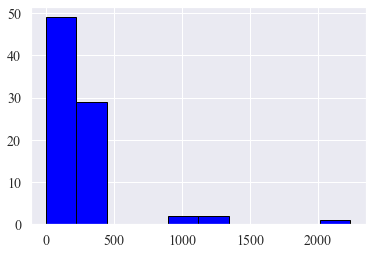

In [95]:
plt.hist(df3b['device_price'], color = 'blue', edgecolor = 'black') #Very skewed, will use median.

In [96]:
for i in df3b.index:
    if df3b['device_price'][i]>1500:
        df3b['device_price'][i]=df3b['device_price'][i]/10
        if 0 < (df3b['device_price'][i]/10) <= 200:
            df3b['affluence'][i]='Low-Affluent'
        elif 200 < (df3b['device_price'][i]/10) <= 450:
            df3b['affluence'][i]='Medium-Affluent'
        elif (df3b['device_price'][i]/10) > 450:
            df3b['affluence'][i]='High-Affluent'
    if pd.isnull(df3b['device_price'][i])==True or df3b['device_price'][i]==0:
        if pd.isnull(df3b['make'][i])==True or df3b['make'][i]=='generic':
            None
        elif pd.isnull(df3b['make'][i])==False:
            df3b['device_price'][i]=df3b[(df3b['make']==df3b['make'][i])].median()[1]
    if pd.isnull(df3b['affluence'][i])==True and pd.isnull(df3b['device_price'][i])==False:
        if df3b['device_price'][i]==0:
            df3b['make'][i]=nan
        else:
            if 0 < (df3b['device_price'][i]) <= 200:
                df3b['affluence'][i]='Low-Affluent'
            elif 200 < (df3b['device_price'][i]) <= 450:
                df3b['affluence'][i]='Medium-Affluent'
            elif (df3b['device_price'][i]) > 450:
                df3b['affluence'][i]='High-Affluent'

In [97]:
df3b=df3b[(pd.isnull(df3b['make'])==False) & (df3b['make']!='generic')]

In [98]:
df3b[(pd.isnull(df3b['affluence'])==True)]

,age,carrier,make,device_price,affluence,brands_visited,place_categories,geo_behaviour,interests,travelled_countries,app_usage,age_group,broadband,home_prop,work_prop,device_age,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser,Geo_Parent,Geo_FamilyGuy,Geo_Learner,Geo_Settled,Geo_ThemeParkGoer,Geo_BeerLover,Geo_Tourist,Geo_TravelWorker,Geo_Traveller,Geo_Clubber,Geo_NeedMoney,Geo_Wealthy,Geo_Healthy,Geo_TechCraft,Geo_Beauty,Geo_AutoOwner,Geo_TrueShopper,Geo_AutoLover,Geo_StudentUndergrad,Geo_FastFood,Geo_NearMarriage,Geo_CoffeeLover,Geo_HomeOwner,Geo_FoodLover,SocialApp,ToolsApp,PhotographyApp,CommunicationApp,ProductivityApp,PhotoVideoApp,PersonalizationApp,HealthFitnessApp,EducationApp,ComicsApp,BeautyApp


In [99]:
df3b.describe()

,age,device_price,distance,PC_EduVisitor,PC_Religious,PC_Sad,PC_HealthPersonal,PC_BookShopper,PC_Fashion,PC_HomeOwner,PC_Clubber,PC_BasicShopper,PC_Smoker,PC_HalalEnjoyer,PC_HighEduVisitor,PC_Learner,PC_Printing,PC_Techs,PC_MidVehicleOwner,PC_Traveller,PC_Workers,PC_Crime,PC_Cafe,PC_AsianFood,PC_WesternFood,PC_Pastry,PC_SweetDessert,PC_Sports,PC_ToyLover,PC_ArtLover,PC_Beauty,PC_Rich,PC_NonCarUser,Geo_Parent,Geo_FamilyGuy,Geo_Learner,Geo_Settled,Geo_ThemeParkGoer,Geo_BeerLover,Geo_Tourist,Geo_TravelWorker,Geo_Traveller,Geo_Clubber,Geo_NeedMoney,Geo_Wealthy,Geo_Healthy,Geo_TechCraft,Geo_Beauty,Geo_AutoOwner,Geo_TrueShopper,Geo_AutoLover,Geo_StudentUndergrad,Geo_FastFood,Geo_NearMarriage,Geo_CoffeeLover,Geo_HomeOwner,Geo_FoodLover,SocialApp,ToolsApp,PhotographyApp,CommunicationApp,ProductivityApp,PhotoVideoApp,PersonalizationApp,HealthFitnessApp,EducationApp,ComicsApp,BeautyApp
count,88.000000,88.000000,79.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,29.261364,269.285227,10.387997,0.833333,0.604167,0.020833,0.0,0.145833,0.479167,0.437500,0.437500,0.125000,0.125000,0.062500,0.395833,0.104167,0.041667,0.354167,0.354167,0.041667,0.395833,0.0,0.187500,0.145833,0.062500,0.166667,0.041667,0.208333,0.145833,0.125000,0.104167,0.083333,0.062500,0.833333,0.833333,0.104167,0.458333,0.020833,0.437500,0.458333,0.062500,0.395833,0.270833,0.583333,0.104167,0.104167,0.083333,0.104167,0.291667,0.104167,0.270833,0.145833,0.041667,0.479167,0.166667,0.437500,0.125000,0.842105,0.368421,0.289474,0.157895,0.184211,0.026316,0.078947,0.026316,0.026316,0.026316,0.026316
std,8.499485,212.459746,29.464113,0.376622,0.494204,0.144338,0.0,0.356674,0.504852,0.501328,0.501328,0.334219,0.334219,0.244623,0.494204,0.308709,0.201941,0.483321,0.483321,0.201941,0.494204,0.0,0.394443,0.356674,0.244623,0.376622,0.201941,0.410414,0.356674,0.334219,0.308709,0.279310,0.244623,0.376622,0.376622,0.308709,0.503534,0.144338,0.501328,0.503534,0.244623,0.494204,0.449093,0.498224,0.308709,0.308709,0.279310,0.308709,0.459340,0.308709,0.449093,0.356674,0.201941,0.504852,0.376622,0.501328,0.334219,0.369537,0.488852,0.459606,0.369537,0.392859,0.162221,0.273276,0.162221,0.162221,0.162221,0.162221
min,19.000000,96.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,171.250000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

#### Save ke excel untuk dianalisis.

In [100]:
df3b.to_excel('FinalNewest.xlsx')